In [4]:
# some plot settings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.family'] = "CMU Serif"
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 120 
plt.rc('text', usetex=True) 

In [5]:
# we will use the tqdm progress bar
from tqdm.auto import tqdm,trange

## 12. How Many Runners in a Marathon?

Write a program that, ﬁrst, randomly picks the value of N (let’s say N can be any integer from 100 to perhaps 1,000 or so), and then asks for the value of the sample size n as a percentage of N. That is, if you answer this question with 5, that means the sample size is to be 5% of the value the program picked for N; e.g., if N = 260, then the sample size will be 0.05 × 260 = 13. It is important to keep in mind that while you of course know the sample size percentage, you do not know the actual sample size because you do not know the value of N. The program then generates, randomly, n different integers in the interval 1 to N (the program does know N, of course!), determines the maximum of those integers, and then uses our above estimation formula to arrive at an estimated value for N. This estimate can then be compared with the actual value of N to determine how well our estimation formula has performed. Speciﬁcally, have your code compute the percentage error in its estimate for each of 10,000 simulations using a ﬁxed sample size percentage of 2% and plot a histogram of those errors. Repeat for sample size percentages of 5%, 10%, and 20%. Do your histograms have any interesting features?

In [6]:
import numpy as np

def estimateError(percentage) :
    p = percentage/100
    sims = 10**4
    errorDat = []
    for i in trange(sims) :
        # total samples
        N = np.random.randint(low=100, high=1000)
        # small sample size
        n = int(N * p)
        # all possible value in the full sample
        fullSample = [i for i in range(1,N+1)]
        # observed values in the small sample
        obs = np.random.choice(fullSample, size=n, replace=False)
        # maximum of the observations
        obs_max = max(obs)
        # N-estimate
        N_estimate = ( ((n+1)/n)*obs_max ) - 1
        # error
        errorDat = errorDat + [(N_estimate-N)/N*100]
    plt.title('Accessible sub-sample: '+str(percentage)+'$\%$')
    plt.ylabel('No. of simulations')
    plt.xlabel('$\%$ error')
    plt.ylim(0, 500)
    plt.xlim(-25, 25)
    plt.hist(errorDat, bins=500 )

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

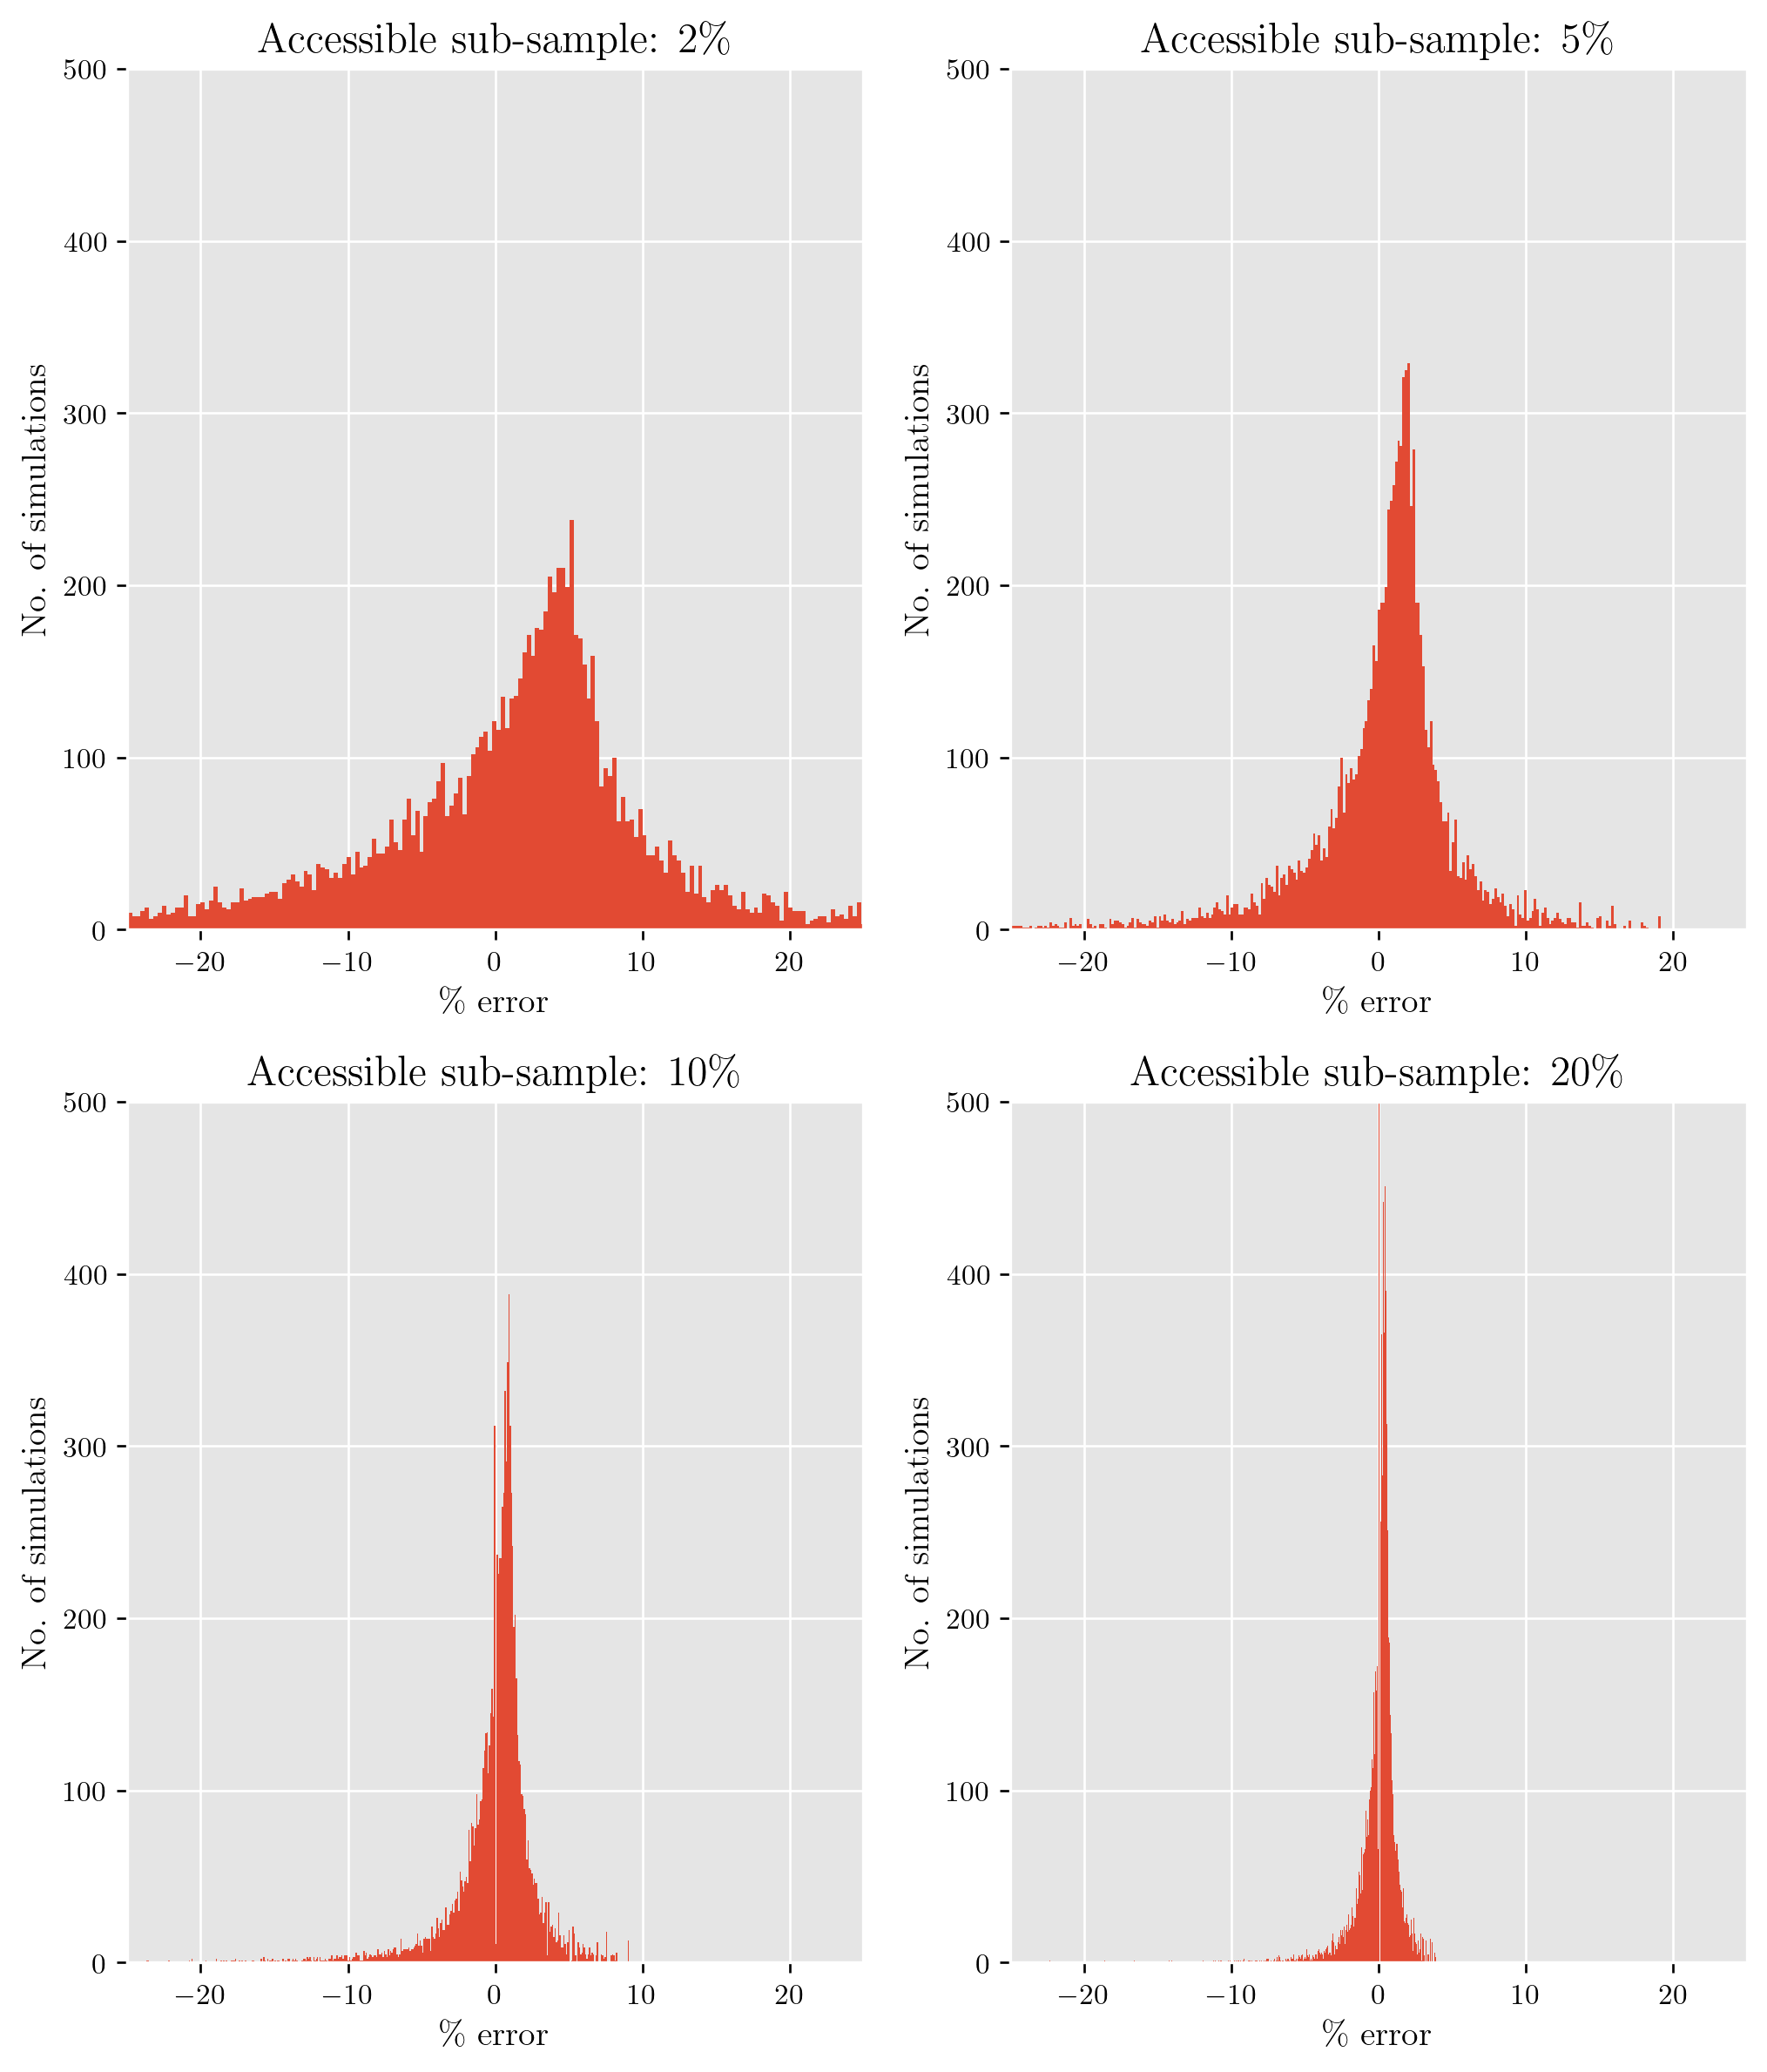

In [7]:
plt.figure(figsize=(10,12))
plt.subplot(2,2, 1)
estimateError(2)
plt.subplot(2,2, 2)
estimateError(5)
plt.subplot(2,2, 3)
estimateError(10)
plt.subplot(2,2, 4)
estimateError(20)

There's a slight bias towards positive errors i.e. this method slightly overestimates the total size of the population. However, it's clear that this bias goes away as we have access to a bigger sub-sample.